In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-historical-datasets/Gold_Daily .csv
/kaggle/input/gold-historical-datasets/Gold_Monthly.csv
/kaggle/input/gold-historical-datasets/Gold_Yearly .csv
/kaggle/input/gold-daily-csv/Gold data.csv


In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../input/gold-historical-datasets/Gold_Daily .csv')

In [4]:
data.shape

(6886, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6886 entries, 0 to 6885
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6886 non-null   object 
 1   Price     6886 non-null   float64
 2   Open      6886 non-null   float64
 3   High      6886 non-null   float64
 4   Low       6886 non-null   float64
 5   Vol       6886 non-null   object 
 6   Change %  6886 non-null   float64
dtypes: float64(5), object(2)
memory usage: 376.7+ KB


In [6]:
data.describe()

,Price,Open,High,Low,Change %
count,6886.000000,6886.000000,6886.000000,6886.000000,6886.000000
mean,909.824807,906.941624,910.127604,903.469021,0.000309
std,541.516040,539.071470,541.323158,536.564722,0.012892
min,253.000000,252.900000,252.900000,252.500000,-0.111300
25%,376.400000,376.200000,376.700000,375.800000,-0.004500
50%,890.900000,889.800000,899.700000,883.350000,0.000200
75%,1359.375000,1349.925000,1352.275000,1347.700000,0.005400
max,2115.200000,2121.700000,2121.700000,2121.700000,0.127100


In [7]:
data.head()

,Date,Price,Open,High,Low,Vol,Change %
0,"Dec 06, 1994",375.8,375.6,376.5,375.1,0.99K,0.0008
1,"Dec 07, 1994",376.1,377.0,377.5,375.1,1.88K,0.0008
2,"Dec 08, 1994",376.6,375.3,376.7,374.8,0.48K,0.0013
3,"Dec 09, 1994",377.0,375.6,377.0,375.5,0.38K,0.0011
4,"Dec 12, 1994",377.5,376.8,377.8,376.5,0.07K,0.0013


2. Pre-Processing Dataset

In [8]:
data = data[['Date','Price']]
data.Date = pd.to_datetime(data.Date, format = '%b %d, %Y')
data.set_index('Date',drop = True, inplace = True)
print(data.shape)
data.head()

(6886, 1)


,Price
Date,
1994-12-06,375.8
1994-12-07,376.1
1994-12-08,376.6
1994-12-09,377.0
1994-12-12,377.5


In [9]:
import datetime
#from datetime import timedate

base = datetime.datetime(data.index.min().year, data.index.min().month, data.index.min().day)
arr = np.array([base + datetime.timedelta(days = i) for i in range((data.index.max() - data.index.min()).days+1)])
data_temp = pd.DataFrame(arr, columns=['date']).set_index('date', drop=True)
print(data_temp.shape)
data_temp.head(10)

(9863, 0)


""
date
1994-12-06
1994-12-07
1994-12-08
1994-12-09
1994-12-10
1994-12-11
1994-12-12
1994-12-13
1994-12-14


In [10]:
data = pd.merge(left=data_temp, right=data,
                     left_on=data_temp.index, right_on=data.index,
                     how='left')
print(data.head(10))
data.set_index('key_0', drop=True, inplace=True)

       key_0  Price
0 1994-12-06  375.8
1 1994-12-07  376.1
2 1994-12-08  376.6
3 1994-12-09  377.0
4 1994-12-10    NaN
5 1994-12-11    NaN
6 1994-12-12  377.5
7 1994-12-13  377.6
8 1994-12-14  378.9
9 1994-12-15  380.2


In [11]:
data.fillna(method = 'ffill',inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9863 entries, 1994-12-06 to 2021-12-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9863 non-null   float64
dtypes: float64(1)
memory usage: 154.1 KB


In [13]:
data.head()

,Price
key_0,
1994-12-06,375.8
1994-12-07,376.1
1994-12-08,376.6
1994-12-09,377.0
1994-12-10,377.0


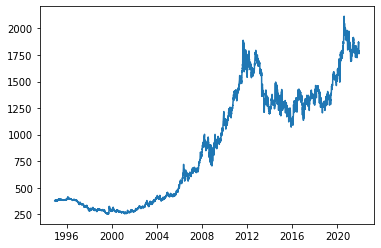

In [14]:
plt.plot(data)

3. Time Series Analysis
Outlier Detection

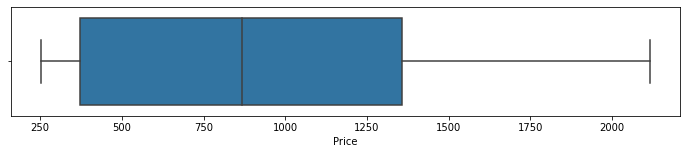

In [15]:
# Box PLot
fig = plt.subplots(figsize = (12, 2))
ax = sns.boxplot(x = data['Price'], whis = 1.5)

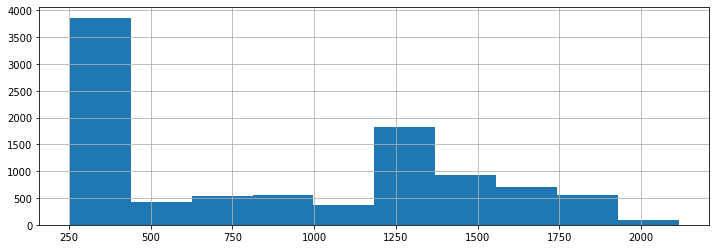

In [16]:
# Histogram
fig = data['Price'].hist(figsize = (12, 4))

4. Time Series Forecasting

In [17]:
# Train-Test split

train_len = int(data.shape[0]*0.80)
train = data[0:train_len] 
test = data[train_len:] 

In [18]:
train

,Price
key_0,
1994-12-06,375.8
1994-12-07,376.1
1994-12-08,376.6
1994-12-09,377.0
1994-12-10,377.0
...,...
2016-07-08,1412.0
2016-07-09,1412.0
2016-07-10,1412.0


In [19]:
test

,Price
key_0,
2016-07-13,1399.00
2016-07-14,1387.70
2016-07-15,1383.50
2016-07-16,1383.50
2016-07-17,1383.50
...,...
2021-12-02,1762.70
2021-12-03,1783.90
2021-12-04,1783.90


Comparing Different Time Series Forecasting Methods

4.1. Naive Method

In [20]:
# Mapping to previous value
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len - 1]

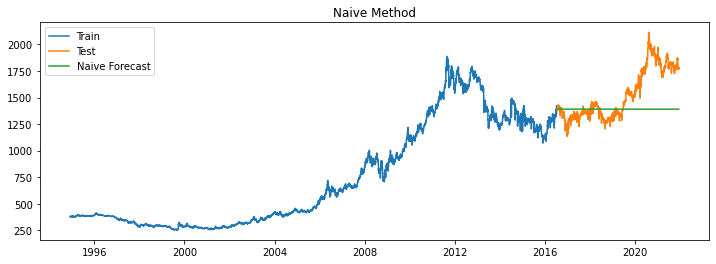

In [21]:
# plotting
plt.figure(figsize = (12, 4))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label = 'Naive Forecast')
plt.legend(loc = 'best')
plt.title('Naive Method')
plt.show()

In [22]:
# Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_naive['naive_forecast'])/test['Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,265.47,11.36


In [23]:
# 4.2. Simple Average Method
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()

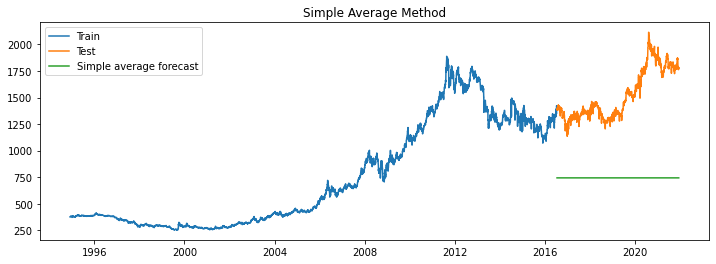

In [24]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [25]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_avg['avg_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Simple average method,815.58,50.27


In [26]:
# 4.3. Simple Moving Average Method
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

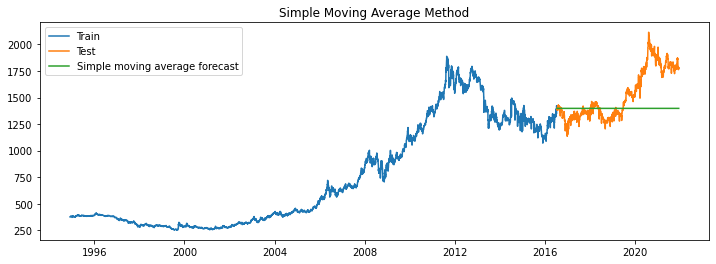

In [27]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'][train_len:], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [28]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Simple moving average forecast,261.81,11.36


In [29]:
# 4.4. Holt's Method with Trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.9005947124699694,
 'smoothing_trend': 0.00021953082349370328,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 375.1800943796563,
 'initial_trend': 0.03814832040810556,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [30]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

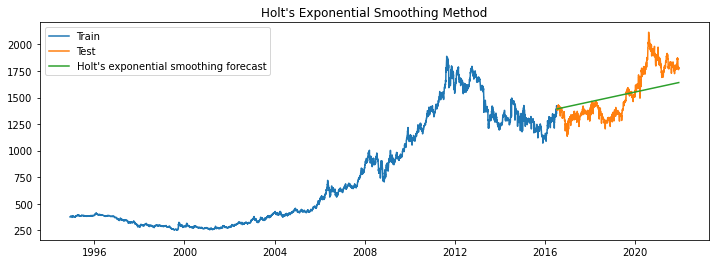

In [31]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [32]:
# Calculate RSME and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_holt['holt_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Holt's exponential smoothing method,171.47,9.12


In [33]:
# 4.5. Holt Winters' additive method with trend and seasonality
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.8898319212669137,
 'smoothing_trend': 0.00025227924395252474,
 'smoothing_seasonal': 0.012141866091698346,
 'damping_trend': nan,
 'initial_level': 377.4490265006313,
 'initial_trend': 0.12824525629089312,
 'initial_seasons': array([-0.30444412, -0.570524  , -0.55757984, -0.33944116,  0.11655776,
         0.17820836, -0.03202382,  0.32479722,  0.34642419,  0.47041154,
         0.26026929,  0.08281927]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
y_hat_hwa['hw_forecast'] = model_fit.forecast(test.shape[0])

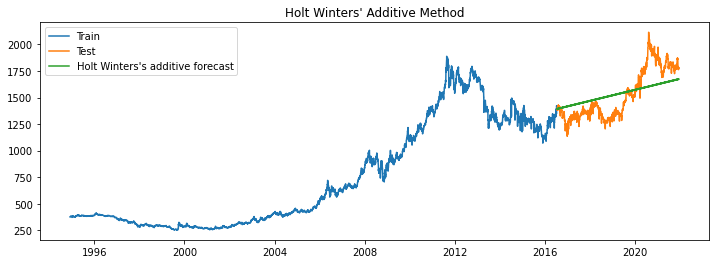

In [35]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [36]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwa['hw_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Holt Winters' additive method,164.77,9.06


In [37]:
# 4.6. Holt Winter's multiplicative method with trend and seasonality
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(test.shape[0])

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


{'smoothing_level': nan, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': nan, 'initial_trend': nan, 'initial_seasons': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


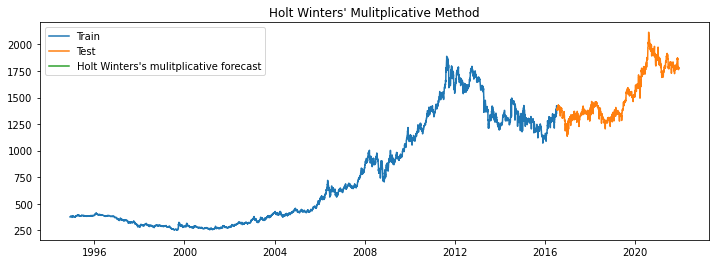

In [38]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc = 'best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [39]:
# Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Price'])

print('ADF Statistic: %f' % adf_test[0])
print('Ceitical Value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -0.206908
Ceitical Value @ 0.05: -2.86
p-value: 0.937693


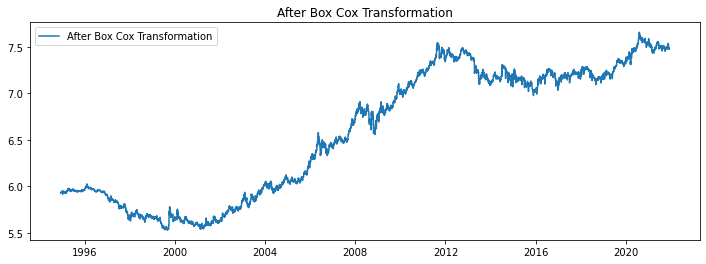

In [40]:
# Box Cox transformation to make variance constant
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Price'], lmbda = 0), index = data.index)
plt.figure(figsize = (12, 4))
plt.plot(data_boxcox, label = 'After Box Cox Transformation')
plt.legend(loc = 'best')
plt.title('After Box Cox Transformation')
plt.show()

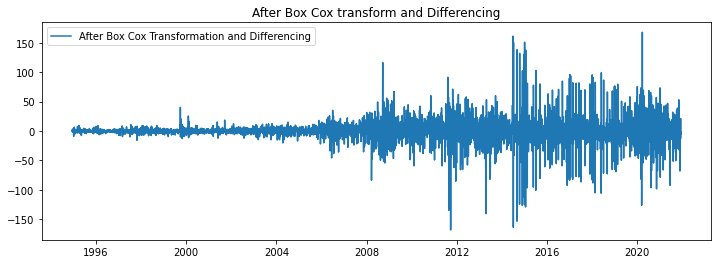

In [41]:
# Differencing to Remove Trend
data_boxcox_diff = pd.Series(data['Price'] - data['Price'].shift(2), data.index)
plt.figure(figsize = (12, 4))
plt.plot(data_boxcox_diff, label = 'After Box Cox Transformation and Differencing')
plt.legend(loc = 'best')
plt.title('After Box Cox transform and Differencing')
plt.show()

In [42]:
data_boxcox_diff.dropna(inplace = True)

In [43]:
# Augmented Dickey-Fuller (ADF) test
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic : %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic : -16.466994
Critical Values @ 0.05: -2.86
p-value: 0.000000


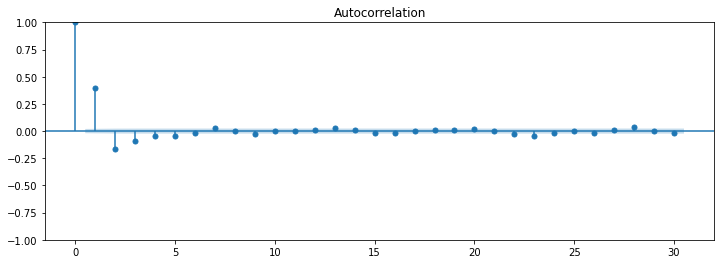

In [44]:
# Autocorrelation Function(ACF)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize = (12, 4))
plot_acf(data_boxcox_diff, ax = plt.gca(), lags = 30)
plt.show()

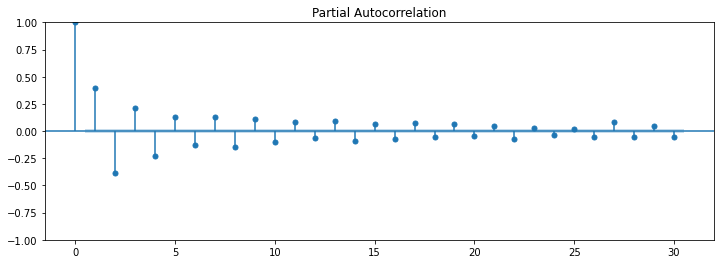

In [45]:
# Partial Autocorrelation Function(PACF)
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize = (12, 4))
plot_pacf(data_boxcox_diff, ax = plt.gca(), lags = 30)
plt.show()

In [46]:
# Train-test split (after box-cox)

train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

In [47]:
# 4.7 . Auto Regressive Integrated Moving Average(ARIMA)
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1, 2, 1), seasonal_order=(0, 0, 0, 0)) 
model_fit = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07138D+00    |proj g|=  8.87229D+00

At iterate    5    f= -3.07431D+00    |proj g|=  3.50773D-01

At iterate   10    f= -3.07646D+00    |proj g|=  7.98590D+00

At iterate   15    f= -3.09087D+00    |proj g|=  3.10800D-01

At iterate   20    f= -3.09092D+00    |proj g|=  3.44054D-01

At iterate   25    f= -3.09564D+00    |proj g|=  4.67372D+00

At iterate   30    f= -3.13542D+00    |proj g|=  4.17381D+00

At iterate   35    f= -3.14692D+00    |proj g|=  1.24292D+00

At iterate   40    f= -3.14839D+00    |proj g|=  2.06881D-01

At iterate   45    f= -3.14851D+00    |proj g|=  5.52259D-02

At iterate   50    f= -3.14852D+00    |proj g|=  1.10451D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [48]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7890
Model:               SARIMAX(1, 2, 1)   Log Likelihood               24841.800
Date:                Thu, 10 Feb 2022   AIC                         -49677.599
Time:                        05:47:24   BIC                         -49656.680
Sample:                    12-06-1994   HQIC                        -49670.434
                         - 07-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0584      0.005    -11.944      0.000      -0.068      -0.049
ma.L1         -0.9999      0.022    -46.254      0.000      -1.042      -0.958
sigma2         0.0001   2.33e-06     46.204      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):            234988.61
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               3.67   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# Recover Original Series
y_hat_arima = test_data_boxcox.copy()
y_hat_arima['arima_forecast_boxcox'] = model_fit.predict(test_data_boxcox.index.min(), test_data_boxcox.index.max())
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

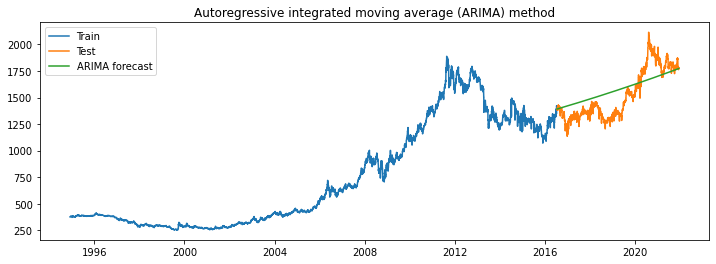

In [50]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [51]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_arima['arima_forecast'][test.index.min():])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Autoregressive integrated moving average (ARIM...,152.89,8.74


In [52]:
test_prediction = model_fit.forecast(150)

In [53]:
test_prediction

2016-07-13    7.238551
2016-07-14    7.238623
2016-07-15    7.238749
2016-07-16    7.238871
2016-07-17    7.238994
                ...   
2016-12-05    7.256301
2016-12-06    7.256424
2016-12-07    7.256546
2016-12-08    7.256669
2016-12-09    7.256792
Freq: D, Name: predicted_mean, Length: 150, dtype: float64